# No-glue-code

In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Cambdrige`


In [2]:
using Random
using LinearAlgebra
using PyPlot

#What we are tweaking
using Revise
using AdvancedHMC
using Turing
using DynamicPPL

[ Info: Precompiling AdvancedHMC [0bf59076-c3b1-5ca4-86bd-e02cd72cde3d]
[ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



## Model

In [3]:
# Just a simple Neal Funnel
d = 21
@model function funnel()
    θ ~ Uniform(-1, 1) #Normal(0, 3)
    z ~ MvNormal(zeros(d-1), exp(θ)*I)
    x ~ MvNormal(z, I)
end

funnel (generic function with 2 methods)

In [4]:
Random.seed!(1)
(;x) = rand(funnel() | (θ=0,))
funnel_model = funnel() | (;x)

Model{typeof(funnel), (), (), (), Tuple{}, Tuple{}, ConditionContext{NamedTuple{(:x,), Tuple{Vector{Float64}}}, DefaultContext}}(funnel, NamedTuple(), NamedTuple(), ConditionContext((x = [1.2142074831535152, 1.23371919965455, -0.8480146960461767, 0.1600994648479841, 1.9180385508479283, -3.401523464506408, -0.0957684186471088, 0.6734622629464286, -3.2749467689509633, -1.6760091758453226, 1.9567202902549736, 0.1136169088905351, 0.11117896909388916, -0.5373922347882832, -0.12436857036298687, -1.2901071061088532, 1.702584517514787, -0.44460133117954226, 1.0818722439221686, 1.2208011493237483],), DefaultContext()))

## Sampling

In [5]:
nadapts=500 
TAP=0.95
ϵ=0.1
nuts = AdvancedHMC.NUTS(nadapts, TAP; ϵ=ϵ)

AdvancedHMC.HMCSampler{Nothing, Nothing, Nothing, Nothing}(AdvancedHMC.NUTS_alg(500, 0.95, 10, 1000.0, 0.1), nothing, nothing, nothing, nothing)

In [6]:
ϵ=0.1
n_leapfrog=20
hmc = AdvancedHMC.HMC(ϵ, n_leapfrog)

AdvancedHMC.HMCSampler{Nothing, Nothing, Nothing, Nothing}(AdvancedHMC.HMC_alg(0.1, 20), nothing, nothing, nothing, nothing)

In [7]:
n_adapts = 500
TAP = 0.95
λ = 0.1 * 10
ϵ=0.1
hmcda = AdvancedHMC.HMCDA(n_adapts, TAP, λ; ϵ=ϵ)

AdvancedHMC.HMCSampler{Nothing, Nothing, Nothing, Nothing}(AdvancedHMC.HMCDA_alg(500, 0.95, 1.0, 0.1), nothing, nothing, nothing, nothing)

In [8]:
nuts_samples = sample(funnel_model, nuts, 5000)

┌ Warning: [DynamicPPL] attempt to link a linked vi
└ @ DynamicPPL ~/.julia/packages/DynamicPPL/jjVG9/src/varinfo.jl:791
┌ Warning: [DynamicPPL] attempt to link a linked vi
└ @ DynamicPPL ~/.julia/packages/DynamicPPL/jjVG9/src/varinfo.jl:791
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02


Chains MCMC chain (5000×34×1 Array{Real, 3}):

Iterations        = 1:1:5000
Number of chains  = 1
Samples per chain = 5000
parameters        = param_1, param_2, param_3, param_4, param_5, param_6, param_7, param_8, param_9, param_10, param_11, param_12, param_13, param_14, param_15, param_16, param_17, param_18, param_19, param_20, param_21
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, is_adapt

Summary Statistics
  parameters      mean       std      mcse     ess_bulk      rhat   ess_per_se ⋯
      Symbol   Float64   Float64   Float64         Real   Float64       Missin ⋯

     param_1    0.1027    0.4682    0.0125    1316.8261    1.0006       missin ⋯
     param_2    0.6380    0.7443    0.0088    7305.3358    1.0007       missin ⋯
     param_3    0.6571    0.7388    0.0087    7222.3134    0.9999       missin ⋯
     param_4   -0

┌ Warning: Tail ESS calculation failed: OverflowError("4750 * 4503599627370496 overflowed for type Int64")
└ @ MCMCChains ~/.julia/packages/MCMCChains/OVsxE/src/stats.jl:319


In [9]:
hmc_samples = sample(funnel_model, hmc, 5000)

┌ Warning: [DynamicPPL] attempt to link a linked vi
└ @ DynamicPPL ~/.julia/packages/DynamicPPL/jjVG9/src/varinfo.jl:791
┌ Warning: [DynamicPPL] attempt to link a linked vi
└ @ DynamicPPL ~/.julia/packages/DynamicPPL/jjVG9/src/varinfo.jl:791
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02


Chains MCMC chain (5000×32×1 Array{Real, 3}):

Iterations        = 1:1:5000
Number of chains  = 1
Samples per chain = 5000
parameters        = param_1, param_2, param_3, param_4, param_5, param_6, param_7, param_8, param_9, param_10, param_11, param_12, param_13, param_14, param_15, param_16, param_17, param_18, param_19, param_20, param_21
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, numerical_error, step_size, nom_step_size, is_adapt

Summary Statistics
  parameters      mean       std      mcse     ess_bulk      rhat   ess_per_se ⋯
      Symbol   Float64   Float64   Float64         Real   Float64       Missin ⋯

     param_1    0.1116    0.4844    0.0126    1412.2510    1.0030       missin ⋯
     param_2    0.6409    0.7630    0.0056   18494.8500    1.0003       missin ⋯
     param_3    0.6563    0.7341    0.0054   18494.8500    1.0023       missin ⋯
     param_4   -0.4489    0.7738    0.0057   18494.8500    

┌ Warning: Tail ESS calculation failed: OverflowError("4750 * 4503599627370496 overflowed for type Int64")
└ @ MCMCChains ~/.julia/packages/MCMCChains/OVsxE/src/stats.jl:319


In [10]:
hmcda_samples = sample(funnel_model, hmcda, 5000)

┌ Warning: [DynamicPPL] attempt to link a linked vi
└ @ DynamicPPL ~/.julia/packages/DynamicPPL/jjVG9/src/varinfo.jl:791
┌ Warning: [DynamicPPL] attempt to link a linked vi
└ @ DynamicPPL ~/.julia/packages/DynamicPPL/jjVG9/src/varinfo.jl:791
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


Chains MCMC chain (5000×32×1 Array{Real, 3}):

Iterations        = 1:1:5000
Number of chains  = 1
Samples per chain = 5000
parameters        = param_1, param_2, param_3, param_4, param_5, param_6, param_7, param_8, param_9, param_10, param_11, param_12, param_13, param_14, param_15, param_16, param_17, param_18, param_19, param_20, param_21
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, numerical_error, step_size, nom_step_size, is_adapt

Summary Statistics
  parameters      mean       std      mcse    ess_bulk      rhat   ess_per_sec ⋯
      Symbol   Float64   Float64   Float64        Real   Float64       Missing ⋯

     param_1    0.0979    0.4865    0.0229    427.6675    1.0077       missing ⋯
     param_2    0.6547    0.7415    0.0160   2189.7809    1.0004       missing ⋯
     param_3    0.6347    0.7416    0.0140   2846.6874    1.0009       missing ⋯
     param_4   -0.4482    0.7324    0.0148   2459.9117    1

┌ Warning: Tail ESS calculation failed: OverflowError("4750 * 4503599627370496 overflowed for type Int64")
└ @ MCMCChains ~/.julia/packages/MCMCChains/OVsxE/src/stats.jl:319


### Plotting

In [11]:
theta_nuts = Vector(nuts_samples["param_1"][:, 1])
x10_nuts =Vector(nuts_samples["param_11"][:, 1]);

In [12]:
theta_hmc = Vector(hmc_samples["param_1"][:, 1])
x10_hmc =Vector(hmc_samples["param_11"][:, 1]);

In [13]:
theta_hmcda = Vector(hmcda_samples["param_1"][:, 1])
x10_hmcda =Vector(hmcda_samples["param_11"][:, 1]);

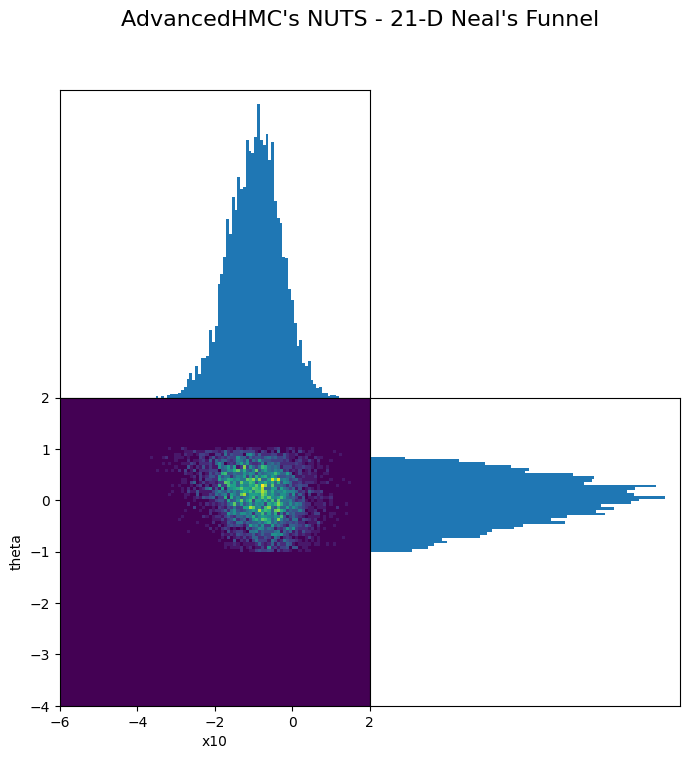

In [14]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("AdvancedHMC's NUTS - 21-D Neal's Funnel", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_nuts, bins=100, range=[-6,2])
axis[1,1].set_yticks([])

axis[2,2].hist(theta_nuts, bins=100, orientation="horizontal", range=[-4, 2])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(x10_nuts, theta_nuts, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta");

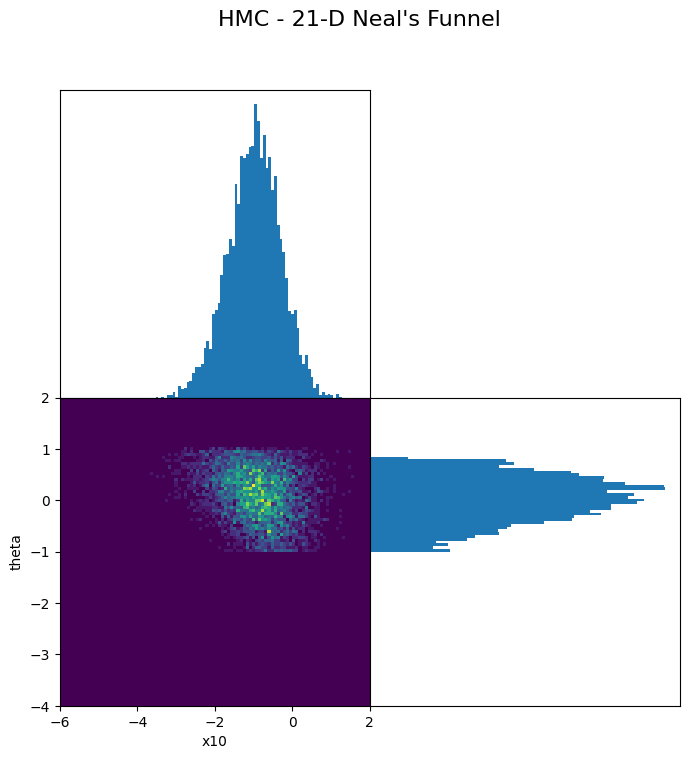

In [15]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("HMC - 21-D Neal's Funnel", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_hmc, bins=100, range=[-6,2])
axis[1,1].set_yticks([])

axis[2,2].hist(theta_hmc, bins=100, orientation="horizontal", range=[-4, 2])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(x10_hmc, theta_hmc, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta");

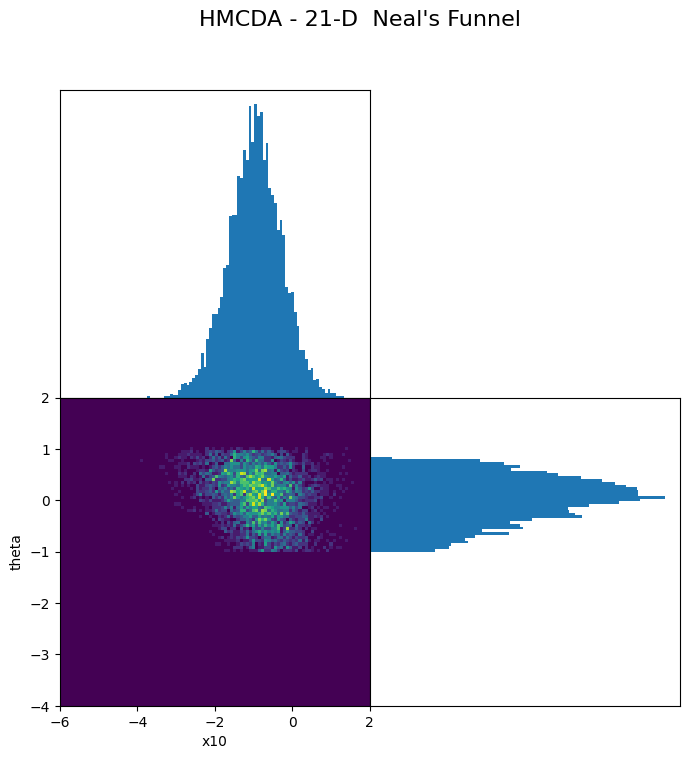

In [16]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("HMCDA - 21-D  Neal's Funnel", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_hmcda, bins=100, range=[-6,2])
axis[1,1].set_yticks([])

axis[2,2].hist(theta_hmcda, bins=100, orientation="horizontal", range=[-4, 2])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(x10_hmcda, theta_hmcda, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta");